In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

D:\win_python\WPy64-3850\python-3.8.5.amd64\lib\site-packages\skfuzzy\control\term.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


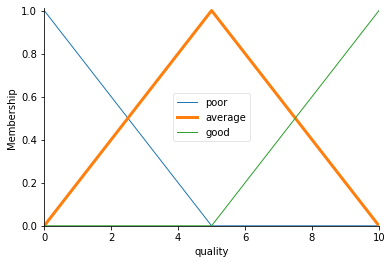

In [2]:
# You can see how these look with .view()
quality['average'].view()

D:\win_python\WPy64-3850\python-3.8.5.amd64\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


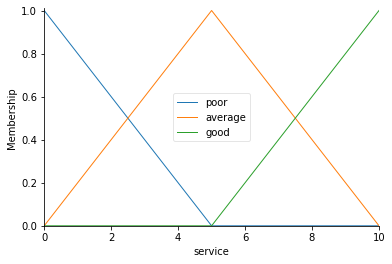

In [3]:
service.view()

D:\win_python\WPy64-3850\python-3.8.5.amd64\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


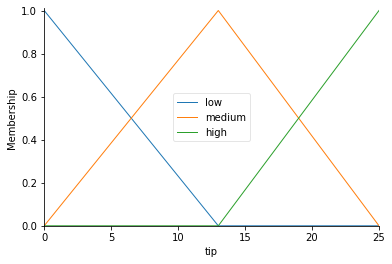

In [4]:
tip.view()

In [5]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

In [6]:
#!pip install git+git://github.com/scikit-fuzzy/scikit-fuzzy.git

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

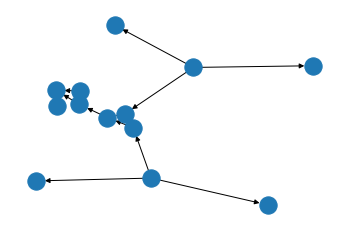

In [7]:
rule1.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

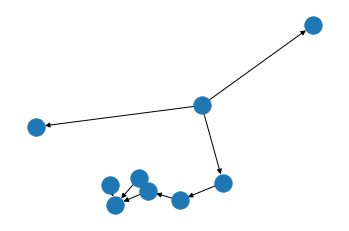

In [15]:
rule2.view()

In [8]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [9]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [25]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 10.0# 5 #6.5
tipping.input['service'] = 10.0#5 #9.8

# Crunch the numbers
tipping.compute()


21.0


D:\win_python\WPy64-3850\python-3.8.5.amd64\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


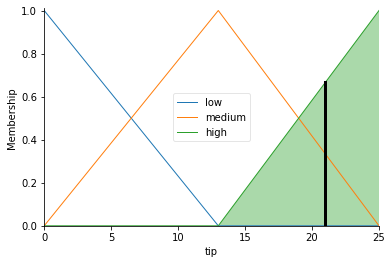

In [26]:
print (tipping.output['tip'])
tip.view(sim=tipping)